# Seaborn


@Realizado por Aldeir Herrera


Libreria escrita por Michael Waskom y construida sobre Matploblib. Nos permite graficar rápido y con personalizaciones pre-seteadas.

Ventajas:
- Velocidad
- Poco código
- Customizable

Su estructura básica es

```
sns.<tipo de grafica>.(
    data=<Dataset>,
    x=<Data en eje x>,
    y=<Data en eje y>,
    hue=<Variable de agrupamiento>
)
```

Seaborn tambien ofrece la solucion a problemas específicos de visualización de datos. 

Podemos clasificar los gráficos de la siguiente forma:

- Replot (relational)
    - scatterplot
    - lineplot
- Displot (distributions)
    - histplot
    - kdeplot
    - ecdfplot
    - rugplot
- Catplot
    - stripplot
    - swarmplot
    - boxplot
    - violinplot
    - pointplot
    - barplot

Sns nos permite invocar con el argumento `kind` las subcategorias desde una categoria superior. Más adelante aplicaremos muchos ejemplos.

## Set
------------

Con set podemos definir de una manera sencilla el tema, paleta de colores, tipo de fuente, etc. Recordemos que seaborn al ser una libreria basada en Matplotlib, tiende a aceptar cambios que realizemos con funciones de matplot; para este caso veamos que sucede con el set.

```{note}
En este [enlace](https://i.redd.it/dtnetzv9slu71.png) puedes encontrar las paletas de colores.
```

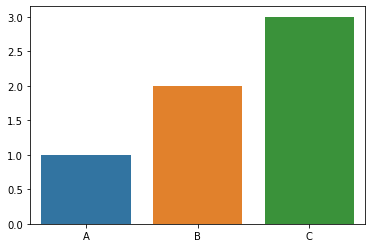

In [6]:
#Este es una grafica sencilla de seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=['A','B','C'], y=[1,2,3])
plt.show()

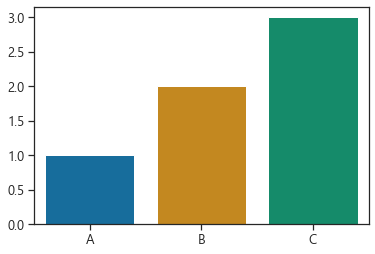

In [16]:
#Vamos a aplicar set
sns.set(style='ticks',palette='colorblind', font='Segoe UI', font_scale=1.2)
sns.barplot(x=['A','B','C'], y=[1,2,3])
plt.show()

## Parametros más usados
------------------------
Existe una gran cantida de gráficos en seaborn. De igual forma muchos de ellos comparten argumentos en común. Vamos al código para aclarar la idea.

In [18]:
tips = sns.load_dataset('tips')
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


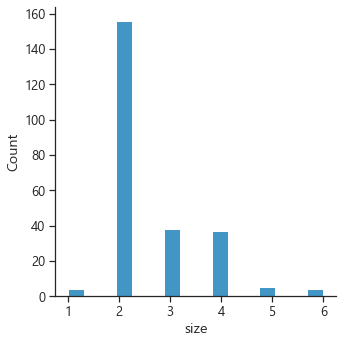

In [25]:
#Como vamos a trabajar con graficas de distribucion usamos "DISPLOT" 
#seaborn automaticamente usa el tipo de grafico que mas nos conviene
sns.displot(data=tips, x='size')
plt.show()

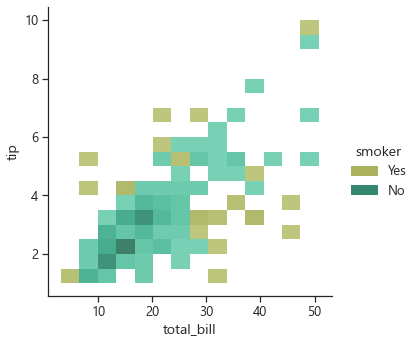

In [38]:
#Grafico de distribucion con parametro "HUE" que funciona para categorizar
sns.displot(data=tips, x='total_bill', y='tip', hue='smoker', palette='gist_earth_r')
plt.show()

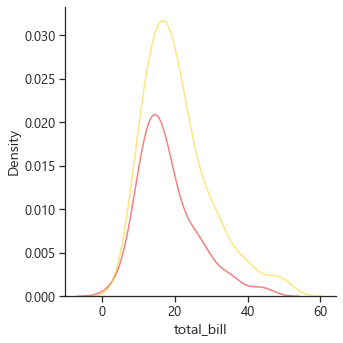

In [69]:
#Aca los hombres dan mas propina
sns.displot(data=tips, x='total_bill', kind='kde', hue='sex', alpha=0.5, palette='hot_r', legend=False)
plt.show()

En resumen algunos parametros comunes y que debemos aprender son:
 - **hue=''** define la categoría en las cuales se dividiran los datos.
 - **palette=''** define el tipo de color que tendran los datos del gráfico.
 - **kind=''** define el subgráfico a utilizar, ya sea de tipo displot, catplot, replot. 
 - **legend=''** permite mostrar en el grafico, las categorías aplicada con **hue**.
 - **alpha=''** nivel de transparencia de las lineas o formas


## Distribuciones

Las distribuciones son un conjunto de graficos que nos permiten visualizar variables numéricas. Con seaborn este tipo de gráficos son llamadas **displot**.



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


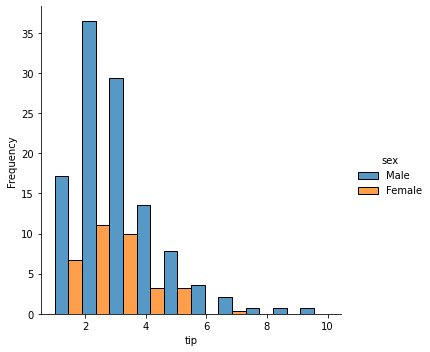

In [22]:
#Vamos a utilizar un histograma
#aplicamos visualizar de forma acumulativa
sns.displot(data=tips, kind='hist',x='tip', cumulative=False, hue='sex', stat='frequency', multiple='dodge', bins=10)
plt.show()

En el histograma anterior aplicamos 4 argumentos adicionales:
- **cumulative=''** va sumando progresivamente cada distribucion
- **stat=''** tipo de operacion estadística que queremos aplicar a la grafica
- **multiple=''** argumento que pretende mapear y dar forma a los subconjuntos de la misma categoría.
- **bins=''** establece la cantidad de cajas disponibles para graficar.

Tambien podemos aplicar directamente el tipo de grafico que queremos utilizar. Es decir `sns.<tipo_de_grafico>`; de esta forma le estamos diciendo a seaborn que queremos utilizar un grafico especifico y dejariamos de usar el argumento `kind`

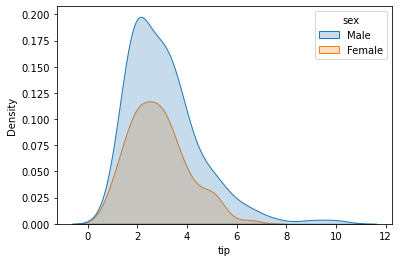

In [29]:
#usamos shade para repintar el area que ocupa cada categoria
sns.kdeplot(data=tips, x='tip', hue='sex', shade=True)
plt.show()

Empirical Cumulative Distribution Function (ecdf). A continuacion puedes leer el siguiente [link](https://hmn.wiki/es/Statistical_distribution) para instruirte de porque y cuando se usa la ecdf

<AxesSubplot:xlabel='tip', ylabel='Count'>

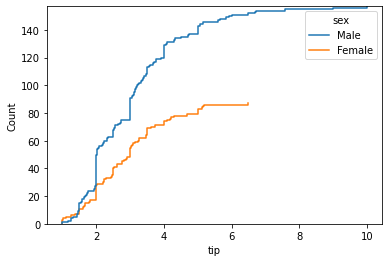

In [34]:
# Grafico ecdf
sns.ecdfplot(data=tips, x='tip', stat='count', hue='sex')

### Reto de distribuciones:
1. Utilizar un grafico de distribución que no se haya visto.
2. Graficar algun valor numerico (total_bill, tip, size) por otra categoria que no sea el sexo (day, time, smoker)


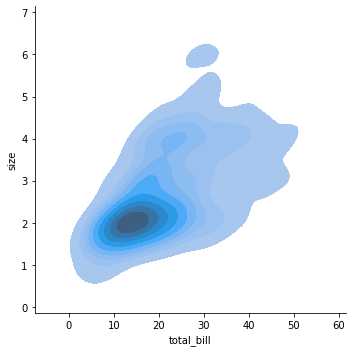

In [42]:
#1 Vamos a utilizar kde pero con DOS ejes escalares
sns.displot(kind='kde', data=tips, x='total_bill', y='size', fill=True)
plt.show()

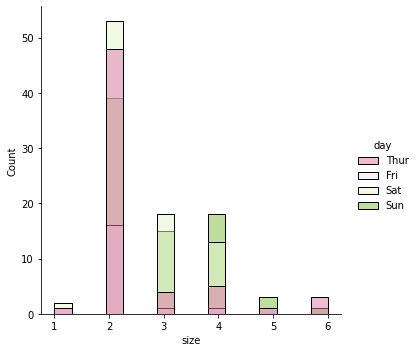

In [54]:
#2. Categorizamos que tanto se repite el tamaño de una orden y luego categorizamos el color por dias
sns.displot( data=tips , x='size', hue='day', palette='PiYG')
plt.show()

## Datos categóricos

Vamos a graficar las variables categoricas es decir, variables que no tiene un valor numerico. Una forma de invocar las variables categoricas es invocando `sns.catplot()`. Vamos a ver los tipos.

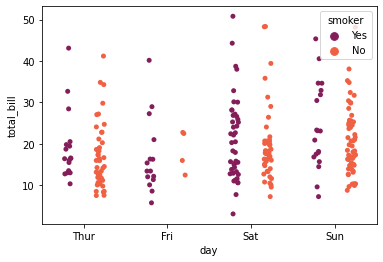

In [63]:
#Tipo stripplot
sns.stripplot(data=tips, x='day', y='total_bill', hue='smoker', dodge=True, palette='rocket')
plt.show()
# dodge para separar los smokers

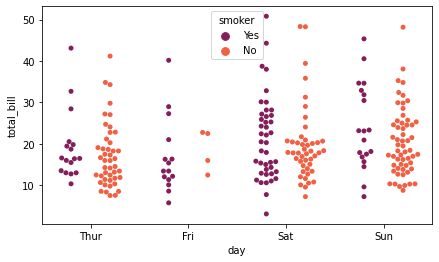

In [66]:
#Tipo swarmplot es parecido a stripplot pero agrega valor en el eje horizontal
plt.figure(figsize=(7,4)) # Al utilizar swarmplot los puntos se acentuan en el eje horizontal por lo tanto
#es necesario ampliar el ancho de la grafica. De otra forma nos mostrara una advertencia
sns.swarmplot(data=tips, x='day', y='total_bill', hue='smoker', dodge=True, palette='rocket')
plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

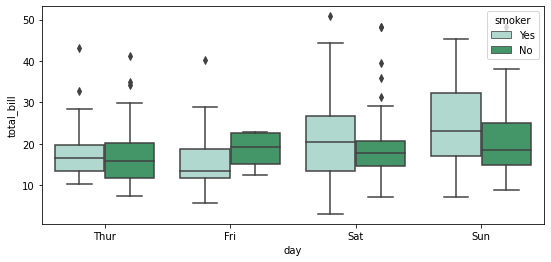

In [94]:
#Boxplot ...UNA DE LAS MAS IMPORTANTES
plt.figure(figsize=(9,4))
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker', dodge=True, palette='BuGn')
#sns.swarmplot(data=tips, x='day', y='total_bill', hue='smoker', dodge=True, palette='bright')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

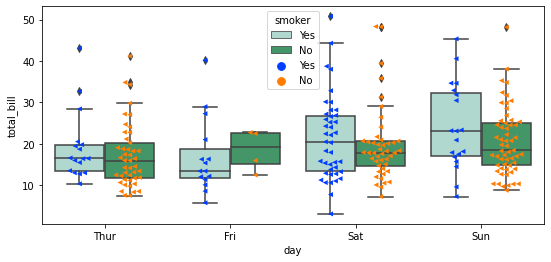

In [96]:
#Podemos unir swarmplo y boxplot y visualizar mejor la distribucion de los datos
plt.figure(figsize=(9,4))
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker', dodge=True, palette='BuGn')
sns.swarmplot(data=tips, x='day', y='total_bill', hue='smoker', dodge=True, palette='bright', marker='<')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

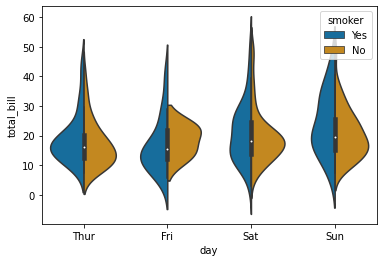

In [102]:
#Violinplot
sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker', palette='colorblind', split=True)
#Split nos permite unir en un solo "violin" la categoria smoker

Todos estos graficos podemos llamarlos desde el argumento `kind` de la funcion Catplot. Es decir que podemos cambiar de gráfico con solo cambiar un parametro.

```{Note}
Puedes leer la documentacion de los graficos tipo Catplot en el siguiente [enlace](https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=cat#seaborn.catplot)
```

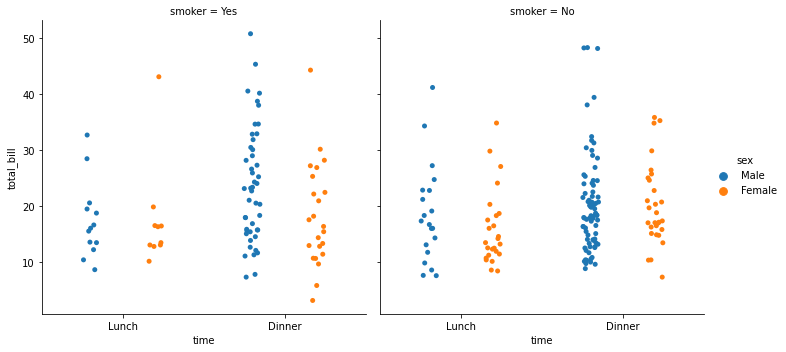

In [105]:
#Esta es otra forma de graficar stripplot. Solo cambiamos el argumento kind (tipo)
sns.catplot(kind='strip', data=tips, x='time',y='total_bill',hue='sex', dodge=True, col='smoker')

En este caso le agregamos el argumento `col` creando una division superior (fumadores y no fumadores). Si queremos cambiar todo este grafico a tipo violin; solo es neceario copiar el mismo codigo y cambiar `kind='violin'`.

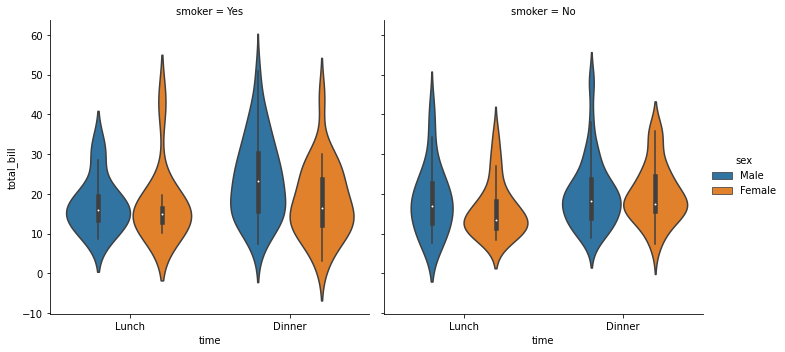

In [107]:
sns.catplot(kind='violin', data=tips, x='time',y='total_bill',hue='sex', dodge=True, col='smoker')
plt.show()

## Relation
-----------------------------------

Gráficos que nos sirven para verificar el grado de relacion entre dos variables. Por ejemplo, si `X` aumenta/disminuye entonces `Y` como se comporta ?

Usaremos relplot y cambiaremos `kind`.

```{admonition}
El argumento `kind` en Relplot solo tiene las opciones de {'scatter' y 'line'}. Puedes leer la documentación en el siguiente [enlace](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot)
```

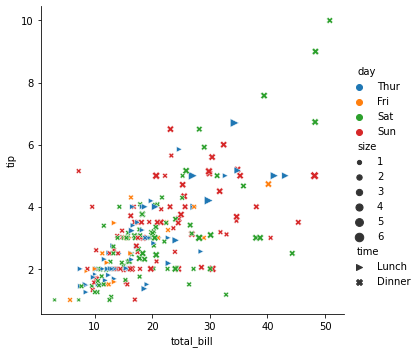

In [129]:
#Grafico scatter o en español Grafico de Dispersion
marcadores = {"Lunch":">", "Dinner":"X"} #Vamos a crear un diccionario escribiendo los marcadores para cada tipo de comida
sns.relplot(
            data=tips, 
            kind='scatter', 
            x='total_bill',
            y='tip', 
            hue='day', 
            size='size', #utilizamos el tamaño de la compra ¨size¨ para aumentar o disminuir el tamaño del punto
            style='time', #style y markers van de la mano
            markers=marcadores # los markers se aplicaran a la categoria que le pasamos a style
            )
#Si la leyenda que contiene los indicadores crees que debes reubicarla puedes ejecuta la sig linea e ir probando la ubicacion
#plt.legend(loc='center', bbox_to_anchor=(1.12,0.6))
plt.show()

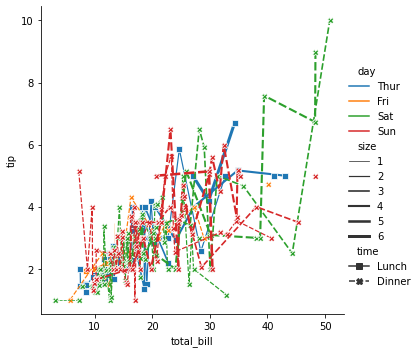

In [143]:
#Grafica lineplot solo le cambiamos el kind a line
marcadores = {"Lunch":"s", "Dinner":"X"} #Vamos a crear un diccionario estableciendo los marcadores para cada tipo de comida
sns.relplot(
            data=tips, 
            kind='line', 
            x='total_bill',
            y='tip', 
            hue='day', 
            size='size', #utilizamos el tamaño de la compra ¨size¨ para aumentar o disminuir el tamaño del punto
            style='time', #style y markers van de la mano
            markers=marcadores # los markers se aplicaran a la categoria que le pasamos a style
            )
#Si la leyenda que contiene los indicadores crees que debes reubicarla puedes ejecuta la sig linea e ir probando la ubicacion
#plt.legend(loc='center', bbox_to_anchor=(1.12,0.6))
plt.show()

#Este grafico no es tan practico y hay que saber muy bien cuando aplicarlo.

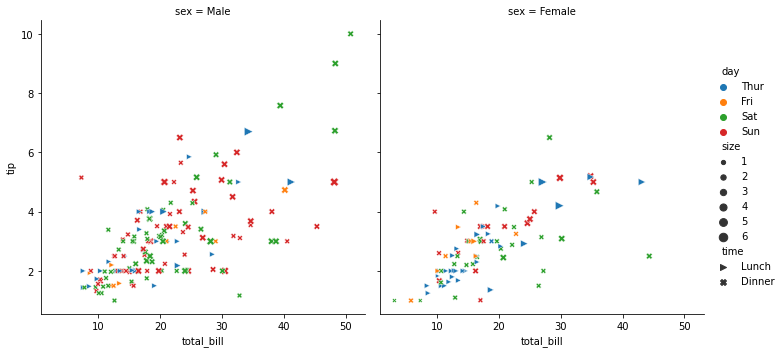

In [146]:
#BONUS!! al primer grafico de (Scatter) apliquemosle otra division
#el parametro COL que usamos anteriormente tambien puede aplicarse a graficos relplot

marcadores = {"Lunch":">", "Dinner":"X"} 
sns.relplot(
            data=tips, 
            kind='scatter', 
            x='total_bill',
            y='tip', 
            hue='day', 
            size='size', 
            style='time', 
            markers=marcadores, 
            col='sex' #Aqui agregamos otra division
            )
plt.show()

## Join-Plot y Pair-plot

### Join Plot
Join plot nos permite visualizar dos gráficos a la vez. Veamos en el codigo como se ejecuta esta función.

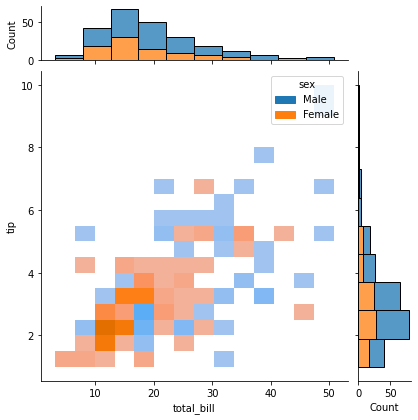

In [183]:
sns.jointplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex',
    #por defecto joinplot grafica un scatter y a los lados graficos kde
    kind='hist', 
    #Marginal hace referencia a los graficos que se encuentran alrededor del orignal
    marginal_ticks=True, #indicamos que muestre un eje de medicion a los graficos Marginals
    marginal_kws=dict(multiple='stack', bins=10) #estos parametros dependen del tipo de grafico 'kind' que apliquemos
)
plt.show()

### Pairplot 
Pairplot nos permite visualizar de manera rápida las variables numericas y su correlación. En nuestro caso tenemos a `total_bill, size, tip` como variables numericas. 



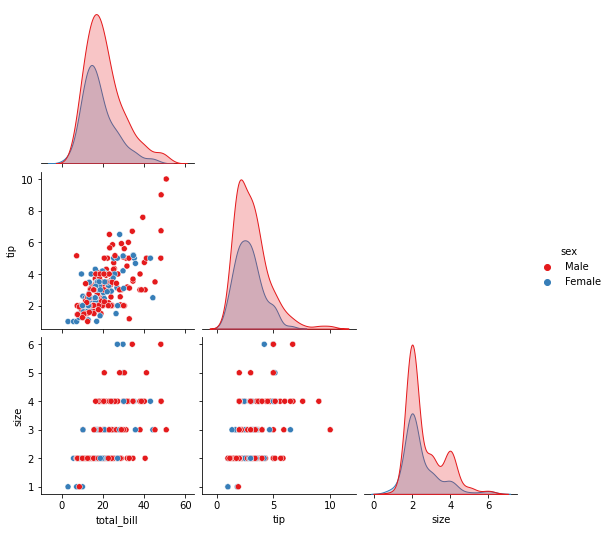

In [190]:
sns.pairplot(
    data=tips,
    hue='sex', #estos dos parametros son los basicos
    #apliquemos algunos parametros de personalizacion
    palette='Set1',
    corner=True,
    kind='scatter' #por defecto pairplot ejecuta scatter pero podemos cambiarlo a otro
    )
plt.show()

## Heatmap

Si bien pairplot nos mostraba de forma gráfica la correlacion entre las variables numericas. Heatmap por otra parte nos muestra la correlacion de las variables en termino de números.

Como primer paso, debemos obtener la **matriz de correlacion** y luego pasarsela como parametro a la funcion **heatmap**. Veamos como se hace.

In [ ]:
# Solo para recordar, importaremos de nuevo el dataset de propinas (tips)
tips = sns.load_dataset('tips')

In [191]:
#Para obtener la matriz de correlacion solo debemos escribir <nombre_dataset>.corr()
tips.corr()
#Corr() es una funcion que viene integrada en los data sets de pandas

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

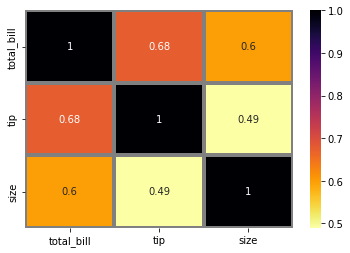

In [208]:
#Heatmap nos ayuda a visualizar de manera grafica la matriz de correlacion
sns.heatmap(
    data=tips.corr(),
    annot=True, #Nos ayuda a visualizar los numeros en cada cuadro

    #Los siguientes parametros son solo personalizacion
    cmap='inferno_r', #esto es equivalente a palette
    linewidth=3.5, #Grosor de separacion entre cada cuadro
    linecolor='gray'#Color de lineas entre los cuadros
)

<AxesSubplot:>

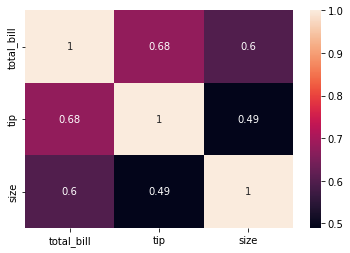

In [209]:
#Si ejecutamos un heatmap limpio
sns.heatmap(
    data=tips.corr(),
    annot=True, #Nos ayuda a visualizar los numeros en cada cuadro
)